In [156]:
# 3 – Quero saber a quantidade de admissões/demissões por gênero no período da pandemia.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import seaborn as sb

In [3]:
# lista de todos os arquivos
caged_files = sorted(glob('..\DadosCaged\CAGEDMOV*.txt'))
# pd.concat((pd.read_csv(file) for file in caged_files))
# print(caged_files)
pandemia_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [4]:
#Lista todos os arquivos carregados e concatenados no dataframe pandemia_df
caged_files

['..\\DadosCaged\\CAGEDMOV202003.txt',
 '..\\DadosCaged\\CAGEDMOV202004.txt',
 '..\\DadosCaged\\CAGEDMOV202005.txt',
 '..\\DadosCaged\\CAGEDMOV202006.txt',
 '..\\DadosCaged\\CAGEDMOV202007.txt',
 '..\\DadosCaged\\CAGEDMOV202008.txt',
 '..\\DadosCaged\\CAGEDMOV202009.txt',
 '..\\DadosCaged\\CAGEDMOV202010.txt',
 '..\\DadosCaged\\CAGEDMOV202011.txt',
 '..\\DadosCaged\\CAGEDMOV202012.txt',
 '..\\DadosCaged\\CAGEDMOV202101.txt',
 '..\\DadosCaged\\CAGEDMOV202102.txt',
 '..\\DadosCaged\\CAGEDMOV202103.txt']

In [5]:
#Lista as colunas do dataframe
pandemia_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [6]:
#Criação do filtro de admissão/demissão
fired = pandemia_df['saldomovimentação'] == -1
hired = pandemia_df['saldomovimentação'] == 1

In [7]:
#Criação do filtro de data(inicio da pandemia até atualmente)
dataPandemiaInicio = pandemia_df['competência'] >= 202003
dataPandemiaAtual = pandemia_df['competência'] <= 202105

In [8]:
#Alteração dos valores numéricos para valores legíveis.
sex = { 1: "homem", 3: "mulher"}
saldomovimentacao = {1: 'admissao', -1: 'demissao'}

In [9]:
#Aplicação dos dics criados para deixar os dados mais legíveis
pandemia_df['sexo'] = pandemia_df['sexo'].apply(lambda x: sex[x])
pandemia_df['saldomovimentação'] = pandemia_df['saldomovimentação'].apply(lambda x: saldomovimentacao[x])

In [10]:
#Exibição dos ultimos 5 registros
pandemia_df.tail()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte
33797762,202103,3,35,355030,A,151201,admissao,724315,102,7,...,2,3,10,0,0,0,1500.000000,99,0,1
33797763,202103,3,35,355030,I,5620101,admissao,513205,111,7,...,0,1,20,0,1,0,6567.000000,7,0,1
33797764,202103,2,25,251370,C,1532700,demissao,764105,101,7,...,0,1,31,0,0,0,1122.000000,10,0,1
33797765,202103,3,33,330455,I,5510801,demissao,513505,101,6,...,0,1,31,0,0,0,1021.419983,5,0,1
33797766,202103,3,35,354980,G,4530701,demissao,142105,101,9,...,0,1,31,0,0,0,4500.000000,4,0,1


In [11]:
#Quantidade de registros pertencentes a cada sexo
pandemia_df['sexo'].value_counts()

homem     20897273
mulher    12900494
Name: sexo, dtype: int64

In [12]:
pandemia_df['competência'].value_counts().sort_index().index

Int64Index([202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010,
            202011, 202012, 202101, 202102, 202103],
           dtype='int64')

In [13]:
admissoes = pandemia_df['saldomovimentação'] == "admissao"
demissoes = pandemia_df['saldomovimentação'] == "demissao"

In [14]:
admissoes_df = pandemia_df[admissoes]
demissoes_df = pandemia_df[demissoes]

In [15]:
admissoes_df[['competência', 'sexo']].value_counts().sort_index()

competência  sexo  
202003       homem      889620
             mulher     570474
202004       homem      423953
             mulher     232276
202005       homem      491766
             mulher     264368
202006       homem      631467
             mulher     320992
202007       homem      769802
             mulher     391647
202008       homem      854371
             mulher     451378
202009       homem      935136
             mulher     516548
202010       homem     1001959
             mulher     616053
202011       homem      953310
             mulher     647888
202012       homem      743151
             mulher     542865
202101       homem      974690
             mulher     622217
202102       homem     1036916
             mulher     698738
202103       homem      988324
             mulher     619683
dtype: int64

In [16]:
mulher = admissoes_df['sexo'] == 'mulher'

In [17]:
homem = admissoes_df['sexo'] == 'homem'

In [18]:
admissoes_df['competência'][mulher].value_counts().sort_index().index

Int64Index([202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010,
            202011, 202012, 202101, 202102, 202103],
           dtype='int64')

In [19]:
admissoes_mulher = admissoes_df['competência'][mulher].value_counts().sort_index().values
admissoes_mulher

array([570474, 232276, 264368, 320992, 391647, 451378, 516548, 616053,
       647888, 542865, 622217, 698738, 619683], dtype=int64)

In [20]:
admissoes_df['competência'][homem].value_counts().sort_index().index

Int64Index([202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010,
            202011, 202012, 202101, 202102, 202103],
           dtype='int64')

In [21]:
admissoes_homem = admissoes_df['competência'][homem].value_counts().sort_index().values
admissoes_homem

array([ 889620,  423953,  491766,  631467,  769802,  854371,  935136,
       1001959,  953310,  743151,  974690, 1036916,  988324], dtype=int64)

In [22]:
total_admissoes_df = admissoes_df['competência'].value_counts().sort_index().values
total_admissoes_df

array([1460094,  656229,  756134,  952459, 1161449, 1305749, 1451684,
       1618012, 1601198, 1286016, 1596907, 1735654, 1608007], dtype=int64)

In [23]:
index_admissoes_df = admissoes_df['competência'].value_counts().sort_index().index

In [24]:
admissoes_sexo = {
    'Mulheres': admissoes_mulher,
    'Homens': admissoes_homem,
    'Total': total_admissoes_df
    }
admissoes_sexo_df = pd.DataFrame(admissoes_sexo, index = index_admissoes_df)

In [25]:
admissoes_sexo_df['Mulheres %'] = round(admissoes_sexo_df['Mulheres'] / admissoes_sexo_df['Total'] * 100,2)
admissoes_sexo_df['Homens %'] = round(admissoes_sexo_df['Homens'] / admissoes_sexo_df['Total'] * 100,2)

In [26]:
admissoes_sexo_df.value_counts()

Mulheres  Homens   Total    Mulheres %  Homens %
232276    423953   656229   35.40       64.60       1
264368    491766   756134   34.96       65.04       1
320992    631467   952459   33.70       66.30       1
391647    769802   1161449  33.72       66.28       1
451378    854371   1305749  34.57       65.43       1
516548    935136   1451684  35.58       64.42       1
542865    743151   1286016  42.21       57.79       1
570474    889620   1460094  39.07       60.93       1
616053    1001959  1618012  38.07       61.93       1
619683    988324   1608007  38.54       61.46       1
622217    974690   1596907  38.96       61.04       1
647888    953310   1601198  40.46       59.54       1
698738    1036916  1735654  40.26       59.74       1
dtype: int64

In [27]:
# Quantidade de admissões por gênero no período da pandemia.
pandemia_df[hired]['sexo'][dataPandemiaInicio & dataPandemiaAtual].value_counts()

homem     10694465
mulher     6495127
Name: sexo, dtype: int64

In [28]:
admissoes_sexo_df.index = admissoes_sexo_df.index.map(str)

In [29]:
mes = {
    '01': "janeiro",
    '02': "fevereiro",
    '03': "marco",
    '04': "abril",
    '05': "maio",
    '06': "junho",
    '07': "julho",
    '08': "agosto",
    '09': "setembro",
    '10': "outubro",
    '11': "novembro",
    '12': "dezembro"
}

In [30]:
admissoes_sexo_df['MesAno'] = admissoes_sexo_df.index.str.slice(start=-2)
admissoes_sexo_df['MesAno'] = admissoes_sexo_df['MesAno'].apply(lambda x: mes[x]) + ' ' + admissoes_sexo_df.index.str.slice(start=0, stop=4)
admissoes_sexo_df.index = admissoes_sexo_df['MesAno']
admissoes_sexo_df

,Mulheres,Homens,Total,Mulheres %,Homens %,MesAno
MesAno,,,,,,
marco 2020,570474,889620,1460094,39.07,60.93,marco 2020
abril 2020,232276,423953,656229,35.40,64.60,abril 2020
maio 2020,264368,491766,756134,34.96,65.04,maio 2020
junho 2020,320992,631467,952459,33.70,66.30,junho 2020
julho 2020,391647,769802,1161449,33.72,66.28,julho 2020
agosto 2020,451378,854371,1305749,34.57,65.43,agosto 2020
setembro 2020,516548,935136,1451684,35.58,64.42,setembro 2020
outubro 2020,616053,1001959,1618012,38.07,61.93,outubro 2020
novembro 2020,647888,953310,1601198,40.46,59.54,novembro 2020


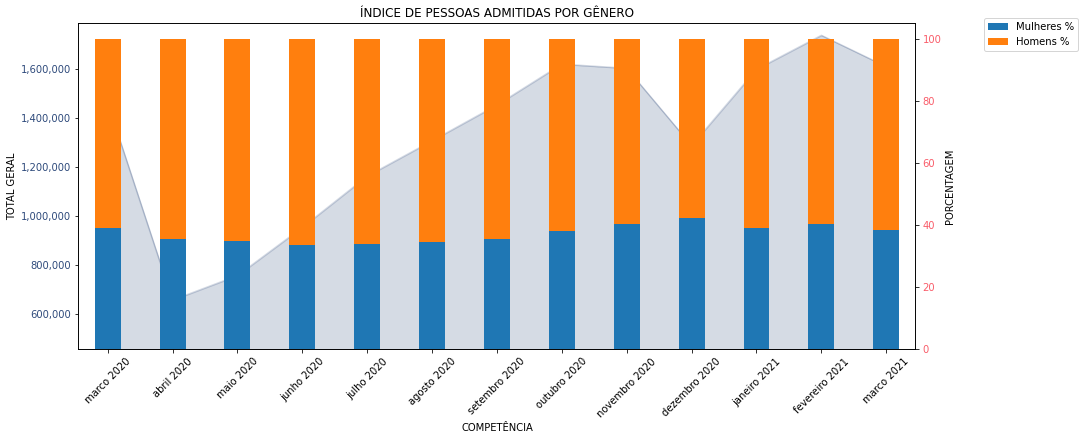

In [31]:
fig, ax1 = plt.subplots()
#ax1
ax1_color = '#2f4b7c'
ax1.set_title('ÍNDICE DE PESSOAS ADMITIDAS POR GÊNERO')
ax1 = admissoes_sexo_df[
    'Total'].plot(kind='area', \
                  alpha=0.2,\
                  color=ax1_color, \
                  figsize = (15,6), \
                  ylim=[admissoes_sexo_df['Total'].min()-200000, admissoes_sexo_df['Total'].max()+50000],
                  ylabel='TOTAL GERAL',
                  xlabel='COMPETÊNCIA'
                 )

plt.xticks(rotation=45)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.ticklabel_format(axis='y',style='plain', ) 
ax1.get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))

#ax2
ax2_color = '#f95d6a'
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor=ax2_color)
admissoes_sexo_df[
    ['Mulheres %', 'Homens %']].plot.bar( \
         width= 0.4, \
        stacked=True,
        ylabel='PORCENTAGEM',
#          ylim=[0, 70],
         ax=ax2).legend(
    bbox_to_anchor=(1.2, .9), loc='lower right')

<AxesSubplot:title={'center':'ÍNDICE DE PESSOAS ADMITIDAS POR GÊNERO NO PERÍODO DA PANDEMIA'}, ylabel='Período de Pandemia'>

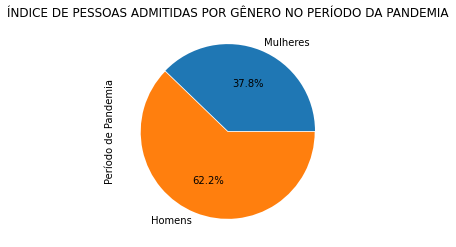

In [32]:
admissoes_sexo_df.sum()[0:2].plot.pie(
    autopct='%1.1f%%',
    explode=(0, 0.01),
    title='ÍNDICE DE PESSOAS ADMITIDAS POR GÊNERO NO PERÍODO DA PANDEMIA',
    ylabel= 'Período de Pandemia'
)

In [34]:
demissoes_df[['competência', 'sexo']].value_counts().sort_index()

competência  sexo  
202003       homem     1032823
             mulher     703621
202004       homem      961351
             mulher     655306
202005       homem      700683
             mulher     427370
202006       homem      611295
             mulher     370282
202007       homem      642592
             mulher     381123
202008       homem      662724
             mulher     399696
202009       homem      711352
             mulher     422064
202010       homem      770083
             mulher     456436
202011       homem      771240
             mulher     431811
202012       homem      834959
             mulher     557870
202101       homem      806951
             mulher     532188
202102       homem      818396
             mulher     522092
202103       homem      878359
             mulher     545508
dtype: int64

In [35]:
mulher = demissoes_df['sexo'] == 'mulher'
homem = demissoes_df['sexo'] == 'homem'

In [36]:
index_demissoes_df = demissoes_df['competência'].value_counts().sort_index().index
index_demissoes_df

Int64Index([202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010,
            202011, 202012, 202101, 202102, 202103],
           dtype='int64')

In [39]:
demissoes_mulher = demissoes_df['competência'][mulher].value_counts().sort_index().values
demissoes_homem = demissoes_df['competência'][homem].value_counts().sort_index().values
total_demissoes_df = demissoes_df['competência'].value_counts().sort_index().values

In [40]:
demissoes_sexo = {
    'Mulheres': demissoes_mulher,
    'Homens': demissoes_homem,
    'Total': total_demissoes_df
    }
demissoes_sexo_df = pd.DataFrame(demissoes_sexo, index = index_demissoes_df)

In [41]:
demissoes_sexo_df['Mulheres %'] = round(demissoes_sexo_df['Mulheres'] / demissoes_sexo_df['Total'] * 100,2)
demissoes_sexo_df['Homens %'] = round(demissoes_sexo_df['Homens'] / demissoes_sexo_df['Total'] * 100,2)

In [42]:
# converte indice para string para pontuar no eixo y
demissoes_sexo_df.index = demissoes_sexo_df.index.map(str)

In [48]:
# Quantidade de demissões por gênero no período da pandemia.
pandemia_df[fired]['sexo'][dataPandemiaInicio & dataPandemiaAtual].value_counts()

homem     10202808
mulher     6405367
Name: sexo, dtype: int64

In [44]:
demissoes_sexo_df['MesAno'] = demissoes_sexo_df.index.str.slice(start=-2)
demissoes_sexo_df['MesAno'] = demissoes_sexo_df['MesAno'].apply(lambda x: mes[x]) + ' ' + demissoes_sexo_df.index.str.slice(start=0, stop=4)
demissoes_sexo_df.index = demissoes_sexo_df['MesAno']
demissoes_sexo_df

,Mulheres,Homens,Total,Mulheres %,Homens %,MesAno
MesAno,,,,,,
marco 2020,703621,1032823,1736444,40.52,59.48,marco 2020
abril 2020,655306,961351,1616657,40.53,59.47,abril 2020
maio 2020,427370,700683,1128053,37.89,62.11,maio 2020
junho 2020,370282,611295,981577,37.72,62.28,junho 2020
julho 2020,381123,642592,1023715,37.23,62.77,julho 2020
agosto 2020,399696,662724,1062420,37.62,62.38,agosto 2020
setembro 2020,422064,711352,1133416,37.24,62.76,setembro 2020
outubro 2020,456436,770083,1226519,37.21,62.79,outubro 2020
novembro 2020,431811,771240,1203051,35.89,64.11,novembro 2020


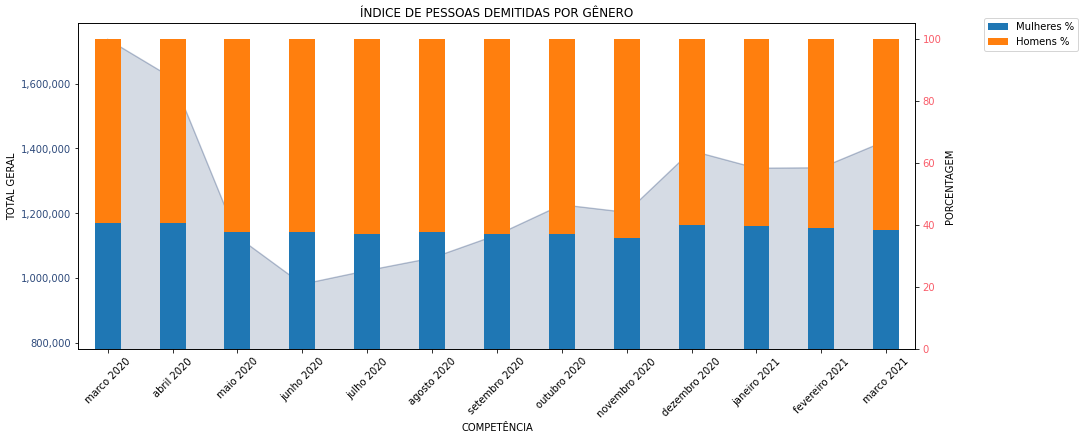

In [46]:

fig, ax1 = plt.subplots()
#ax1
ax1_color = '#2f4b7c'
ax1.set_title('ÍNDICE DE PESSOAS DEMITIDAS POR GÊNERO NO PERIODO DA PANDEMIA')
ax1 = demissoes_sexo_df[
    'Total'].plot(kind='area', \
                  alpha=0.2,\
                  color=ax1_color, \
                  figsize = (15,6), \
                  ylim=[demissoes_sexo_df['Total'].min()-200000, demissoes_sexo_df['Total'].max()+50000],
                  ylabel='TOTAL GERAL',
                  xlabel='COMPETÊNCIA'
                 )

plt.xticks(rotation=45)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.ticklabel_format(axis='y',style='plain', ) 
ax1.get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))

#ax2
ax2_color = '#f95d6a'
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor=ax2_color)
demissoes_sexo_df[
    ['Mulheres %', 'Homens %']].plot.bar( \
        width= 0.4, \
        stacked=True,
        ylabel='PORCENTAGEM',
#          ylim=[0, 70],
         ax=ax2).legend(
    bbox_to_anchor=(1.2, .9), loc='lower right')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped

<AxesSubplot:title={'center':'ÍNDICE DE PESSOAS DEMITIDAS POR GÊNERO'}, ylabel='Período de Pandemia'>

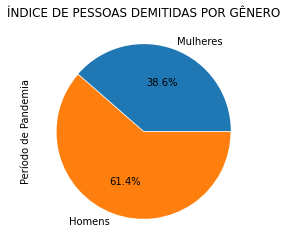

In [47]:
demissoes_sexo_df.sum()[0:2].plot.pie(
    autopct='%1.1f%%',
    explode=(0, 0.01),
    title='ÍNDICE DE PESSOAS DEMITIDAS POR GÊNERO NO PERÍODO DA PANDEMIA',
    ylabel= 'Período de Pandemia'
)